In [123]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import pandas as pd
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load Data

In [125]:
from utils.config import get_cfg_defaults
from utils.singleton_swaps_optimization import swaps_optimization_cfg
import sparse

config_path = "/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/corrected_RT_tol_pred_120min_library_140ms_20240729_081002_598461/config_20240729_081002_598461.yaml"
cfg = get_cfg_defaults(swaps_optimization_cfg)
cfg.merge_from_file(config_path)
maxquant_result_ref = pd.read_pickle(cfg.DICT_PICKLE_PATH)

mobility_values_df = pd.read_csv(os.path.join(cfg.RESULT_PATH, "mobility_values.csv"))
ms1scans = pd.read_csv(os.path.join(cfg.RESULT_PATH, "ms1scans.csv"))

In [126]:
act_3d = sparse.load_npz(
    os.path.join(
        cfg.RESULT_PATH, "results", "activation", "im_rt_pept_act_coo_peptbatch0.npz"
    )
)

In [127]:
if cfg.RESULT_ANALYSIS.MQ_EXP_PATH == "":
    maxquant_result_exp = maxquant_result_ref
    logging.info(
        "Experiment data not given, using reference intensity as experiment data!"
    )
elif cfg.RESULT_ANALYSIS.MQ_EXP_PATH[-4:] == ".txt":
    maxquant_result_exp = pd.read_csv(cfg.RESULT_ANALYSIS.MQ_EXP_PATH, sep="\t")
elif cfg.RESULT_ANALYSIS.MQ_EXP_PATH[-4:] == ".pkl":
    maxquant_result_exp = pd.read_pickle(cfg.RESULT_ANALYSIS.MQ_EXP_PATH)
elif cfg.RESULT_ANALYSIS.MQ_EXP_PATH[-4:] == ".csv":
    maxquant_result_exp = pd.read_csv(cfg.RESULT_ANALYSIS.MQ_EXP_PATH)
dir_with_extension = os.path.basename(os.path.normpath(cfg.DATA_PATH))
if cfg.RESULT_ANALYSIS.FILTER_BY_RAW_FILE is not None:
    if cfg.RESULT_ANALYSIS.FILTER_BY_RAW_FILE == "":
        cfg.RESULT_ANALYSIS.FILTER_BY_RAW_FILE = dir_with_extension.rstrip(".d")
    logging.info(
        "Filtering experiment data by raw file: %s",
        cfg.RESULT_ANALYSIS.FILTER_BY_RAW_FILE,
    )
    maxquant_result_exp = maxquant_result_exp[
        maxquant_result_exp["Raw file"] == cfg.RESULT_ANALYSIS.FILTER_BY_RAW_FILE
    ]

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2073730/2732949898.py:7: DtypeWarning: Columns (62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  maxquant_result_exp = pd.read_csv(cfg.RESULT_ANALYSIS.MQ_EXP_PATH, sep="\t")
2024-07-29 12:48:08,178 - root - INFO - Filtering experiment data by raw file: Hela2ug_lowflow_30min_1to37to42_NCE29to59_140ms7R_RA2_1_2086


# Exam individual peptide image

In [128]:
top_mz_bins = maxquant_result_ref["mz_bin"].value_counts().head(5)
ref_top_mz_bins = maxquant_result_ref[
    maxquant_result_ref["mz_bin"].isin(top_mz_bins.index)
]
tmp = ref_top_mz_bins.loc[
    :,
    [
        "Modified sequence",
        "Charge",
        "mz_rank",
        "Calibrated retention time start",
        "Retention time",
        "Calibrated retention time finish",
        "mz_bin",
        "1/K0",
    ],
].sort_values(["mz_bin", "Retention time"])

In [129]:
maxquant_result_ref.loc[
    maxquant_result_ref["Modified sequence"] == "_TQEAGALGVSDR_", "mz_rank"
]
maxquant_result_ref.loc[
    maxquant_result_ref["Modified sequence"] == "_TFEGHDASVLK_", "mz_rank"
]

8853    15198
Name: mz_rank, dtype: int64

8977    15205
Name: mz_rank, dtype: int64

2024-07-29 12:49:42,960 - utils.plot - INFO - Dictionary entry      Modified sequence  Charge      1/K0  RT_search_left  RT_search_right  \
8853    _TQEAGALGVSDR_       2  0.920808        5.345857         6.971591   

      RT_search_center  Retention time  Number of data points  Number of scans  
8853          6.158724          14.918                    281               21  
2024-07-29 12:49:42,968 - utils.plot - WARNING - No experiment match is found.
2024-07-29 12:49:42,970 - postprocessing.ims_3d - DEBUG - No reference RT range given, using dictionary entries: 6.158724069821645, (5.345857084723391, 6.971591054919899).
2024-07-29 12:49:42,973 - postprocessing.ims_3d - DEBUG - No reference IM range given, using dictionary entries: 0.9207486184542762, (0.8807486184542762, 0.9607486184542763).
2024-07-29 12:49:42,974 - utils.plot - INFO - Reference entry: [6.158724069821645, 0.9207486184542762]
2024-07-29 12:49:45,962 - utils.plot - INFO - Sum of data 3D heatmap: 1000047.5965531742
20

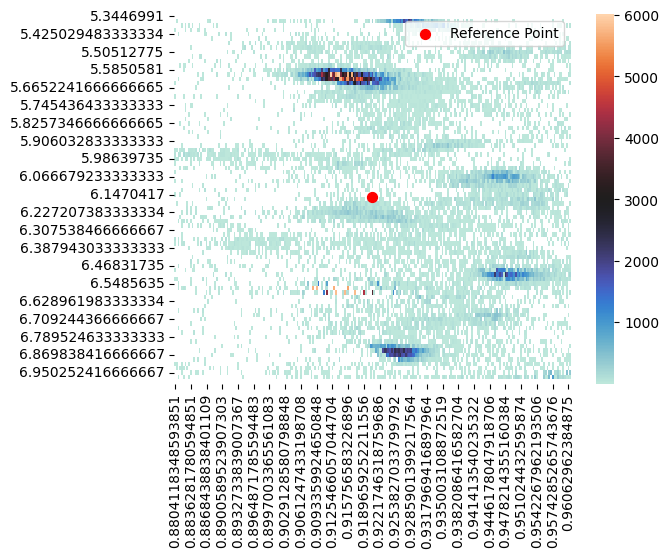

In [130]:
%autoreload 2
from utils.plot import plot_pept_im_rt_heatmap

plot_pept_im_rt_heatmap(
    pept_mz_rank=15198,
    act_3d=act_3d,
    maxquant_result_dict=maxquant_result_ref,
    maxquant_result_exp=maxquant_result_exp,
    plot_range="custom",
    #rt_range=(12.86, 13.27),
    #rt_range=(8)
    mobility_values_df=mobility_values_df,
    ms1scans=ms1scans,
    log_intensity=False
)

2024-07-29 12:50:00,959 - utils.plot - INFO - Dictionary entry      Modified sequence  Charge      1/K0  RT_search_left  RT_search_right  \
8977     _TFEGHDASVLK_       2  0.943375        5.320433         6.946167   

      RT_search_center  Retention time  Number of data points  Number of scans  
8977            6.1333          15.078                    518               20  
2024-07-29 12:50:00,970 - utils.plot - INFO - Experiment result:        Modified sequence  Charge  Calibrated retention time start  \
159416     _TFEGHDASVLK_       2                           6.0065   

        Calibrated retention time finish      1/K0  1/K0 length  \
159416                            6.1269  0.947821     0.041633   

        Number of data points  Retention length  
159416                    325           0.12041  , bounding box available: [6.0065, 6.1269, 0.12040000000000006, 0.9270046965000001, 0.9686381835, 0.041633487]
2024-07-29 12:50:00,976 - postprocessing.ims_3d - DEBUG - No reference 

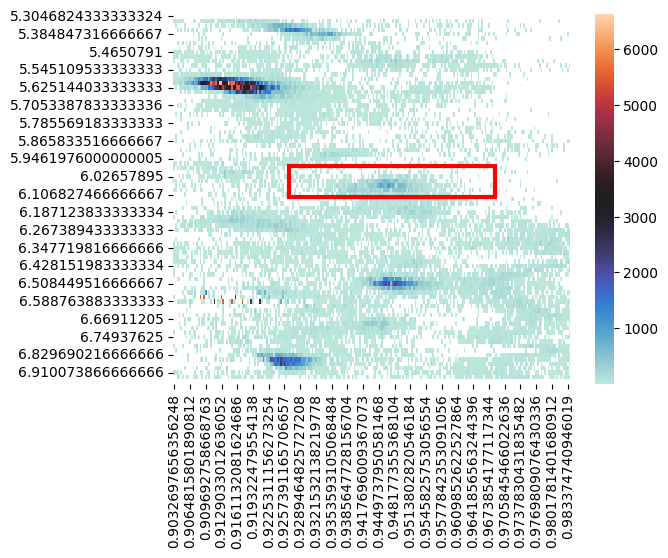

In [131]:
plot_pept_im_rt_heatmap(
    pept_mz_rank=15205,
    act_3d=act_3d,
    maxquant_result_dict=maxquant_result_ref,
    maxquant_result_exp=maxquant_result_exp,
    mobility_values_df=mobility_values_df,
    plot_range="custom",
    # rt_range=(12.86, 13.27),
    ms1scans=ms1scans,
    log_intensity=False,
)

In [ ]:
import importlib

importlib.reload(result_analysis)
from result_analysis import result_analysis

pept_act_sum_df = pd.read_csv(
    os.path.join(cfg.RESULT_PATH, "results", "activation", "pept_act_sum.csv")
)
pept_act_sum_df["mz_rank"] = pept_act_sum_df.index
eval_dir = os.path.join(cfg.RESULT_PATH, "results", "evaluation")
os.makedirs(eval_dir, exist_ok=True)
if "predicted_RT" not in maxquant_result_ref.columns:
    maxquant_result_ref["predicted_RT"] = maxquant_result_ref["RT_search_center"]

sbs_result = result_analysis.SBSResult(
    maxquant_ref_df=maxquant_result_ref,
    # maxquant_merge_df=maxquant_result_ref,
    maxquant_exp_df=maxquant_result_ref,
    filter_by_rt_ovelap=["full_overlap"],
    sum_raw=pept_act_sum_df,
    ims=True,
)

sbs_result.plot_intensity_corr(
    ref_col="Intensity",
    inf_col="pept_act_sum",
    contour=False,
    # group_by="Leading razor protein"
    save_dir=eval_dir,
)

# Overlap with MQ
sbs_result.plot_overlap_with_MQ(save_dir=eval_dir, show_ref=True)

2024-04-03 16:14:08,032 - result_analysis.result_analysis - INFO - Reference shape: (36743, 81)
2024-04-03 16:14:08,091 - result_analysis.result_analysis - DEBUG - sum cols: ['mz_rank', 'sum_raw']
2024-04-03 16:14:08,227 - result_analysis.compare_maxquant - DEBUG - Maxquant experiment file has 37448 entries.
2024-04-03 16:14:08,228 - result_analysis.compare_maxquant - DEBUG - columns after merge MQ dict and MQ exp Index(['Modified sequence', 'Charge', 'predicted_RT', 'm/z', 'Mass', 'Length',
       'id', 'RT_search_left', 'RT_search_right',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Calibrated retention time', 'Retention time', 'Intensity', '_merge'],
      dtype='object')
2024-04-03 16:14:08,909 - result_analysis.compare_maxquant - INFO - RT overlap counts: full_overlap       37544
partial_overlap     3863
no_overlap          1994
Name: RT_overlap, dtype: int64


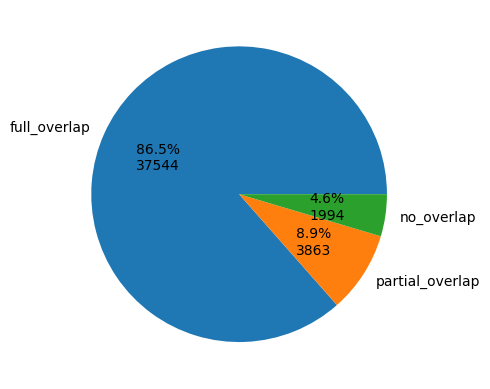

2024-04-03 16:14:09,218 - result_analysis.result_analysis - INFO - No filter_by_rt_overlap is specified, use all entries for plotting.
2024-04-03 16:14:09,265 - result_analysis.compare_maxquant - INFO - Removing 8250 entries with aggregation over PCM, 35151 entries left.
2024-04-03 16:14:09,266 - result_analysis.compare_maxquant - DEBUG - columns after agg Index(['Modified sequence', 'Charge', 'Calibrated retention time start',
       'Calibrated retention time finish', 'Calibrated retention time',
       'Retention time', 'Intensity', 'id', 'Mass', 'm/z', 'Length'],
      dtype='object')
2024-04-03 16:14:09,296 - result_analysis.result_analysis - INFO - Ref exp inner join shape: (36743, 14)


In [171]:
%autoreload 2
from result_analysis.result_analysis import SBSResult
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_result_dict,
    maxquant_exp_df=maxquant_result_exp,
    sum_raw=sum_raw,
    #sum_gaussian = auc_raw,
    ims=True,
)
sbs_ims_result.compare_with_maxquant_exp_int(
    filter_by_rt_overlap=None, save_dir=None)


Data:  Intensity_log sum_raw_log , slope =  0.68 , intercept =  0.672 , PearsonR =  0.696 , SpearmanR =  0.752


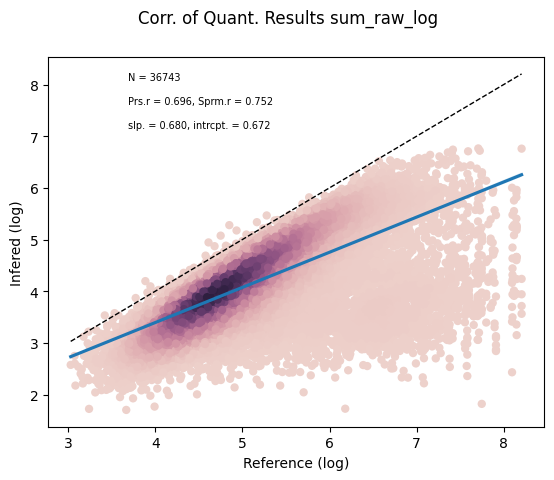

In [172]:
sbs_ims_result.plot_intensity_corr(
    inf_col="sum_raw",
    interactive=False,
    save_dir=None,
    contour=False,
    log_x=True,
    log_y=True,
    hover_data=["mz_rank", "Modified sequence", "Charge"],
    # color=SBS_ss1FDR_PSM.ref_exp_df_inner["Length"],
)

2024-04-03 14:22:07,287 - utils.plot - DEBUG - RT search range: [12.949009017446059, 14.74900901744606]
2024-04-03 14:22:07,288 - utils.plot - DEBUG - mod_seq: _SLYQSAGVAPESFEYIEAHGTGTK_, charge: 3
2024-04-03 14:22:07,293 - utils.plot - DEBUG - RT exp range [array([13.554]), array([13.711])]


,Time_minute,raw,Scan index
0,12.964942,173.522305,NaN
1,12.984647,0.000000,NaN
2,13.004381,11.773809,NaN
3,13.023998,0.000000,NaN
4,13.043576,77.589440,NaN
...,...,...,...
86,14.656036,123.473891,NaN
87,14.675634,0.000000,NaN
88,14.695496,0.000000,NaN
89,14.715132,0.000000,NaN


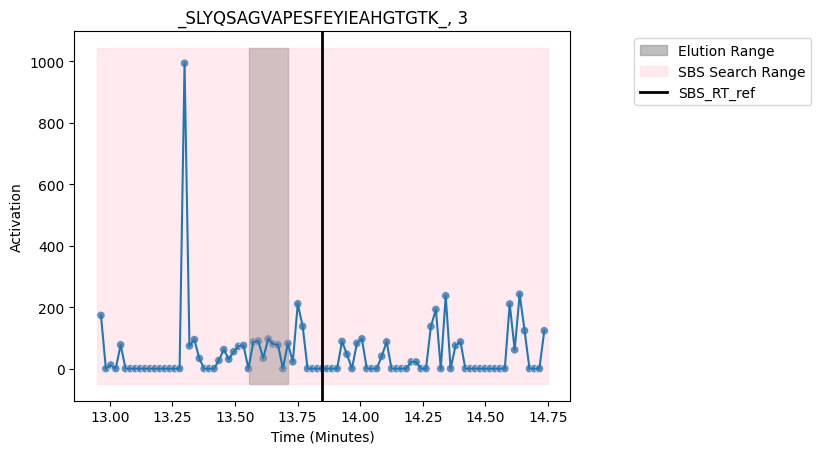

In [135]:
from utils.plot import plot_activation

activation = activation.fillna(0)
pept_idx = 178243
plot_activation(
    maxquant_ref_row=maxquant_result_dict.loc[
        maxquant_result_dict["mz_rank"] == pept_idx, :
    ],
    maxquant_exp_df=maxquant_result_exp,
    precursor_activations=[activation.loc[:, pept_idx]],
    activation_labels=["raw"],
    ms1scan_no_array=ms1scans.loc[activation.index.values],
    ms1scan_time_col="Time_minute",
)

In [5]:
# Make result directory
report_dir = os.path.join(result_dir, "report")
if not os.path.exists(report_dir):
    os.makedirs(report_dir)
    os.makedirs(os.path.join(report_dir, "activation"))

# Statistics

# Batch Correlation and Report

### Precursor specific trouble shooting

In [6]:
# Load MS1 scans from pkl or mzml file
msconvert_file = (  # path to the data input in mzML format, containing only MS1 level data
    "/mnt/cmnfs/proj/ORIGINs/protMSD/GCF_profile/msconvert_profile.mzML"
)
with open(msconvert_file[:-5] + ".pkl", "rb") as f:
    MS1Scans = pickle.load(f)

In [27]:
from optimization.dictionary import CalcModpeptIsopattern

Maxquant_result_dict["IsoMZ"], Maxquant_result_dict["IsoAbundance"] = zip(
    *Maxquant_result_dict.apply(
        lambda row: CalcModpeptIsopattern(
            modpept=row["Modified sequence"], charge=row["Charge"], ab_thres=0.001
        ),
        axis=1,
    )
)

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

Precursor  18083 eluted at  76.242 , corresponding scan index  3829 with scan time  76.2416156238556


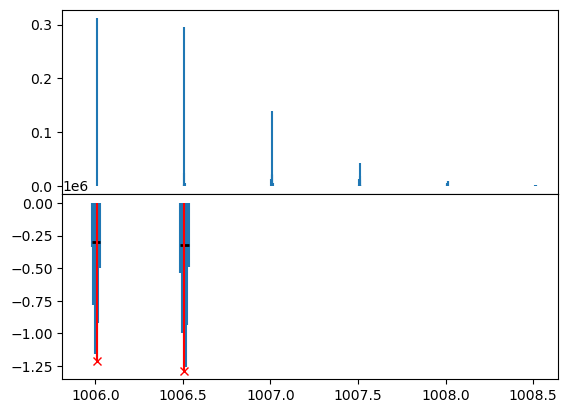

,apex_mzidx,apex_mz,start_mzidx,start_mz,end_mzidx,end_mz,peak_width,peak_height,peak_intensity_sum
0,7,1006.007087,4,1005.978361,9,1006.026239,0.047878,302067.40625,4.906113e+06
1,20,1006.505206,18,1006.486040,23,1006.533955,0.047914,321781.87500,5.505740e+06


In [28]:
from result_analysis.result_analysis import PlotIsoPatternAndScan

PlotIsoPatternAndScan(
    MS1Scans=MS1Scans,
    Maxquant_result=Maxquant_result_dict,
    scan_idx=None,
    precursor_idx=18083,
    log_intensity=False,
)

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

Cosine distance of non zero entries in prediction: 0.00980649186033511
Intensity Explained: 0.0434
Peaks Explained: 0.4591


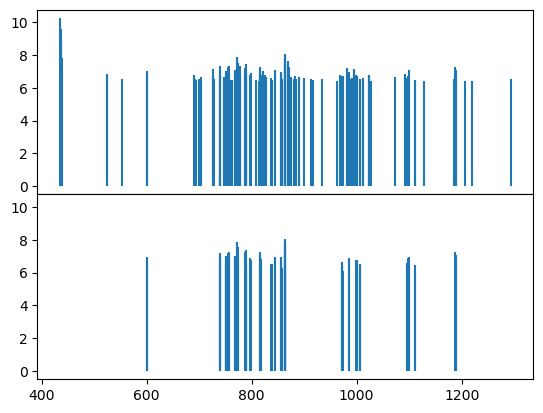

In [29]:
from optimization.dictionary import ConstructDict
from result_analysis.result_analysis import PlotTrueAndPredict

alignment = []
scan_idx = 3830
RT_tol = 1
alpha = 10
# example: generate dictionary for candidate in one scan
OneScan = MS1Scans.iloc[scan_idx, :]
CandidatePrecursorsByRT = Maxquant_result_dict.loc[
    (
        Maxquant_result_dict["Calibrated retention time start"] - RT_tol
        <= OneScan["starttime"]
    )
    & (
        Maxquant_result_dict["Calibrated retention time finish"] + RT_tol
        >= OneScan["starttime"]
    )
]
if CandidatePrecursorsByRT.shape[0] > 0:
    (
        CandidateDict,
        CandidatePrecursorsByRT,
        alignment,
        IsotopeNotObs,
        y_true,
        peak_results,
    ) = ConstructDict(CandidatePrecursorsByRT, OneScan, method="peakRange")
    filteredPrecursorIdx = np.array(CandidateDict.columns[0:], dtype=int)
    if CandidateDict.shape[1] > 1:
        (
            activationByScan,
            lossByScan,
            scoreByScan,
            pred,
            IntensityExplained,
            peaksExplained,
        ) = utility.CalcPrecursorQuant(
            CandidateDict,
            y_true,
            filteredPrecursorIdx=filteredPrecursorIdx,
            alpha=alpha,
        )
        activation[filteredPrecursorIdx, scan_idx] = activationByScan
        # non_empty_scans.append((scan_idx, OneScan['starttime'], lossByScan, scoreByScan, CandidatePrecursorsByRT.index, filteredPrecursorIdx))
        # ScanProcessRecords[scan_idx] = {'alignment':alignment}
        PlotTrueAndPredict(
            x=CandidateDict.index, prediction=pred, true=y_true["intensity"], log=True
        )
        print("Cosine distance of non zero entries in prediction:", scoreByScan)
        print("Intensity Explained:", np.round(IntensityExplained, 4))
        print("Peaks Explained:", np.round(peaksExplained, 4))
    else:
        print(
            "Scan number, start time ",
            scan_idx,
            OneScan["starttime"],
            "does not have valid candidate.",
        )
        # empty_scans.append((scan_idx, OneScan['starttime'], 'No valid candidate after isotope pattern matching.'))

else:
    print(
        "Scan number, start time ",
        scan_idx,
        OneScan["starttime"],
        "does not have valid candidate.",
    )
    # empty_scans.append((scan_idx, OneScan['starttime'], 'No valid candidate by RT'))

In [30]:
alignment[303]["abundance"].sum()
IsotopeNotObs[303]["abundance"].sum()

0.5232761444636144

0.4490588887347563

In [32]:
Maxquant_result_dict.loc[11557, "IsoAbundance"].sum()

0.9723350331983707

In [33]:
idx = np.where(filteredPrecursorIdx == 18082)
activationByScan[idx]

array([9769022.28253018])

In [17]:
import IsoSpecPy as iso

pair = [18083, 18082]
Maxquant_result_dict.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result_dict.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result_dict.loc[pair[1], "Modified sequence"])

,Modified sequence,Charge,Retention time,Intensity,m/z
18083,_VNQIGTLTETFEAIEM(ox)AK_,2,76.242,27290000.0,1006.00626
18082,_VNQIGTLTETFEAIEM(ox)AK_,2,75.905,NaN,1006.00626


OrderedDict([('C', 99), ('H', 162), ('N', 24), ('O', 32), ('S', 1)])

OrderedDict([('C', 99), ('H', 162), ('N', 24), ('O', 32), ('S', 1)])

In [122]:
import IsoSpecPy as iso

Maxquant_result_dict.loc[
    [738, 10695], ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result_dict.loc[738, "Modified sequence"])
iso.ParseFASTA(Maxquant_result_dict.loc[10695, "Modified sequence"])

,Modified sequence,Charge,Retention time,Intensity,m/z
738,_AISVDELQK_,2,21.921,26158000.0,501.776939
10695,_LGLENVETK_,2,21.921,26158000.0,501.776939


OrderedDict([('C', 43), ('H', 73), ('N', 11), ('O', 15), ('S', 0)])

OrderedDict([('C', 43), ('H', 73), ('N', 11), ('O', 15), ('S', 0)])

In [121]:
pair = [15879, 12747]
Maxquant_result_dict.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result_dict.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result_dict.loc[pair[1], "Modified sequence"])

,Modified sequence,Charge,Retention time,Intensity,m/z
15879,_TDLINAVAEASSLSK_,2,70.373,20798000.0,759.904128
12747,_NIFSDPLTIEEIK_,2,70.373,20798000.0,759.906139


OrderedDict([('C', 64), ('H', 109), ('N', 17), ('O', 24), ('S', 0)])

OrderedDict([('C', 69), ('H', 109), ('N', 15), ('O', 22), ('S', 0)])

In [127]:
pair = [3772, 3774]
Maxquant_result_dict.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result_dict.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result_dict.loc[pair[1], "Modified sequence"])

,Modified sequence,Charge,Retention time,Intensity,m/z
3772,_EHGAVFIIGIGDALR_,3,62.458,7362600.0,523.291219
3774,_EHGAVFIIGIGDALR_,3,62.330,NaN,523.291219


OrderedDict([('C', 71), ('H', 112), ('N', 20), ('O', 19), ('S', 0)])

OrderedDict([('C', 71), ('H', 112), ('N', 20), ('O', 19), ('S', 0)])

In [128]:
pair = [15120, 14965]
Maxquant_result_dict.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result_dict.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result_dict.loc[pair[1], "Modified sequence"])

,Modified sequence,Charge,Retention time,Intensity,m/z
15120,_SLAEQNVILCFASGR_,2,62.377,8509700.0,832.924871
14965,_SIAAFAIHQFFQER_,2,62.060,NaN,832.930814


OrderedDict([('C', 69), ('H', 112), ('N', 20), ('O', 21), ('S', 1)])

OrderedDict([('C', 78), ('H', 111), ('N', 21), ('O', 19), ('S', 0)])

In [129]:
for idx in [738, 10695] + [15120, 14965] + [3772, 3774] + [15879, 12747]:
    _ = postprocessing.post_processing.PlotActivation(
        MaxquantEntry=Maxquant_result_dict.iloc[idx, :],
        PrecursorTimeProfiles=[
            activation[idx, :],
            refit_activation_minima[idx, :],
            refit_activation_gaussian[idx, :],
        ],
        PrecursorTimeProfileLabels=["None", "LocalMinima", "Gaussian"],
        MS1ScansNoArrary=MS1Scans_NoArray,
        save_dir=os.path.join(report_dir, "activation", "outliers"),
    )